# Import All Customer Churn Dataset

In [1]:
# dataset reading-manipıulation library
import pandas as pd

#import numpy as np

# label encoding lirary for object type columns of the dataset
from sklearn.preprocessing import LabelEncoder

# normalization library for the dataset
from sklearn.preprocessing import StandardScaler

# dataset split library for train and test datasets 
from sklearn.model_selection import train_test_split

# libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier    
from sklearn.ensemble import RandomForestClassifier

# evaluation metric libraries for evaluating mahine learning algorithms
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plot libraries to get confusion matrix(heatmap) and scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\hasan\OneDrive\Masaüstü\Data_Science\Data_Science_Projects\Customer_Churn_Dataset\data\all_customer_churn_data.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,30,Female,39,14,5,18,Standard,Annual,932,17,1
1,2,65,Female,49,1,10,8,Basic,Monthly,557,6,1
2,3,55,Female,14,4,6,18,Basic,Quarterly,185,3,1
3,4,58,Male,38,21,7,7,Standard,Monthly,396,29,1
4,5,23,Male,32,20,5,8,Basic,Monthly,617,20,1


---

# Converting Categorical Data To Numerical Data

In [4]:
# creating instance of LabelEncoder
label_encoder = LabelEncoder()

## Gender Attribute

In [5]:
data['Gender_Numerical'] = label_encoder.fit_transform(data['Gender'])

## Subscription Type

In [6]:
data['Subscription_Type_Numerical'] = label_encoder.fit_transform(data['Subscription Type'])

## Contract Length

In [7]:
data['Contract_Length_Numerical'] = label_encoder.fit_transform(data['Contract Length'])

---

# Normalization Of The Dataset

In [8]:
Y = data['Churn'].to_numpy()

In [9]:
X = data.drop(columns=['CustomerID', 'Gender', 'Subscription Type', 'Contract Length', 'Churn'])

In [10]:
# creating instance of StandardScaler
standard_scaler = StandardScaler()

In [11]:
X_normalized = standard_scaler.fit_transform(X)

In [12]:
pd.DataFrame(X_normalized).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.765883,0.443776,-0.198951,0.372314,0.532844,1.272897,0.277572,-1.116257,1.213024,-1.126764
1,1.996425,1.023907,-1.707192,1.967923,-0.650423,-0.256223,-1.000267,-1.116257,-1.242935,0.002781
2,1.207194,-1.006554,-1.359137,0.691436,0.532844,-1.773110,-1.348769,-1.116257,-1.242935,1.132327
3,1.443963,0.385762,0.613178,1.010558,-0.768750,-0.912725,1.671579,0.895851,1.213024,0.002781
4,-1.318345,0.037683,0.497160,0.372314,-0.650423,-0.011564,0.626074,0.895851,-1.242935,0.002781


---

# Split The Dataset Into Train/Test Datasets

In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [14]:
print('train_X Dataset: ', train_X.shape)
print('test_X Dataset: ', test_X.shape)

train_X Dataset:  (404164, 10)
test_X Dataset:  (101042, 10)


In [15]:
print('train_Y Dataset: ', train_Y.shape)
print('test_Y Dataset: ', test_Y.shape)

train_Y Dataset:  (404164,)
test_Y Dataset:  (101042,)


## Checking If the Splitted Datasets Are Balanced Or Not

**Balanced-Imbalanced Datasets can effect the evaluation metric for the model evaluation step.**
<Br>Cusomer Churn Dataset can be accepted as balanced dataset by depending on the below results.
<Br>Therefore, **Accuracy=(TP+TN)/(TP+FP+FN+TN)** can be used as evaluation metric.

In [16]:
# test dataset churn ratio can be accepted as balanced since it has 55.482% Churned(1) customer record
pd.DataFrame(test_Y).value_counts()[1]/(pd.DataFrame(test_Y).value_counts()[0]+pd.DataFrame(test_Y).value_counts()[1])

0.5548286851012451

In [17]:
# train dataset churn ratio can be accepted as balanced since it has 55.529% Churned(1) customer record
pd.DataFrame(train_Y).value_counts()[1]/(pd.DataFrame(train_Y).value_counts()[0]+pd.DataFrame(train_Y).value_counts()[1])

0.5552968596906206

---

# Applying Classification ML Models To Train Dataset

1. Logistic Regression
2. K-Nearest Neighbours(KNN)
3. Naïve Bayes
4. Decision Tree Classification
5. Random Forest Classification

## 1. Logistic Regression

In [18]:
log_reg = LogisticRegression()

In [19]:
log_reg.fit(train_X, train_Y)

LogisticRegression()

In [20]:
yhat_log_reg = log_reg.predict(test_X)

## 2. K-Nearest Neighbours(KNN)

In [21]:
knn_classifier = KNeighborsClassifier()

In [22]:
knn_classifier.fit(train_X, train_Y)

KNeighborsClassifier()

In [23]:
yhat_knn_classifier = knn_classifier.predict(test_X)

## 3. Naïve Bayes

In [24]:
naive_bernoulli = BernoulliNB()

In [25]:
naive_bernoulli.fit(train_X, train_Y)

BernoulliNB()

In [26]:
yhat_naive_bernoulli = naive_bernoulli.predict(test_X)

## 4. Decision Tree Classification

In [27]:
tree_classifier = DecisionTreeClassifier()

In [28]:
tree_classifier.fit(train_X, train_Y)

DecisionTreeClassifier()

In [29]:
yhat_tree_classifier = tree_classifier.predict(test_X)

## 5. Random Forest Classification

In [30]:
rand_forest_classifier = RandomForestClassifier()

In [31]:
rand_forest_classifier.fit(train_X, train_Y)

RandomForestClassifier()

In [32]:
yhat_rand_forest_classifier = rand_forest_classifier.predict(test_X)

---

# Evaluating Applied Models

The Churn Dataset is a balanced dataset. Therefore, models are evaluated by considering minimum Type-1 Error and Type-2 Error. <Br>Also, best fitted model has the highest accuracy score.

1. Confusion Matrix
2. False Positive Rate(FPR) [Type-1 Error]
3. False Negative Rate(FNR) [Type-2 Error]
4. Accuracy

## 1. Confusion Matrix

In [33]:
# defining a plot function for the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    
    confusion_matrix_data = confusion_matrix(y_true, y_pred)
    
    fig = sns.heatmap(confusion_matrix_data, fmt='.7g', annot=True)
    fig.set(title='Confusion Matrix', xlabel='Predicted Labels', ylabel='Actual Labels')
    fig.set_xticklabels(['Un-Churned(0)', 'Churned(1)'])
    fig.set_yticklabels(['Un-Churned(0)', 'Churned(1)'])
    plt.show()
    
    print('Confusion Matrix As Array Data: \n [[00(True_Negative)  10(False_Positive)]\n [ 01(False_Negative) 11(True_Positive)]]\n',confusion_matrix_data)

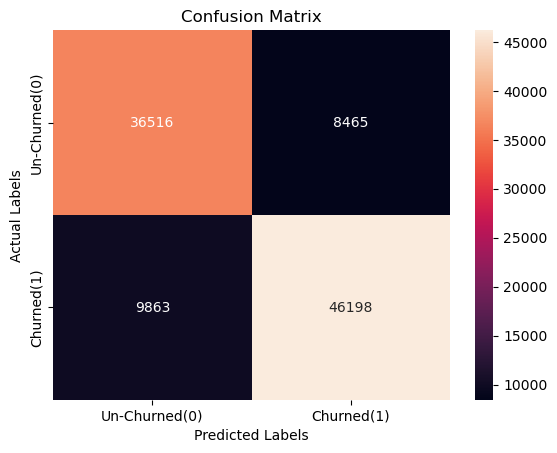

Confusion Matrix As Array Data: 
 [[00(True_Negative)  10(False_Positive)]
 [ 01(False_Negative) 11(True_Positive)]]
 [[36516  8465]
 [ 9863 46198]]


In [34]:
# Logistic Regression Confusion Matrix
plot_confusion_matrix(test_Y, yhat_log_reg)

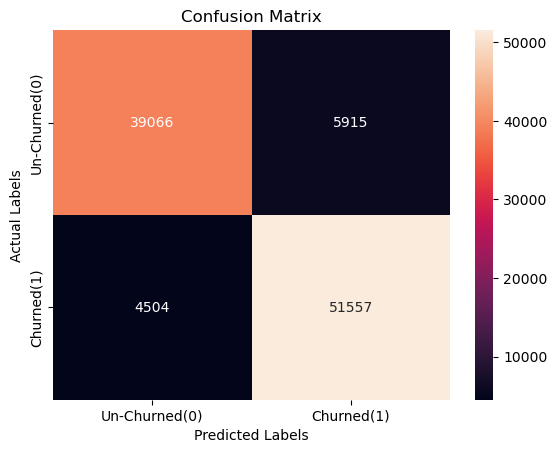

Confusion Matrix As Array Data: 
 [[00(True_Negative)  10(False_Positive)]
 [ 01(False_Negative) 11(True_Positive)]]
 [[39066  5915]
 [ 4504 51557]]


In [35]:
# K-NearestNeighbors Confusion Matrix
plot_confusion_matrix(test_Y, yhat_knn_classifier)

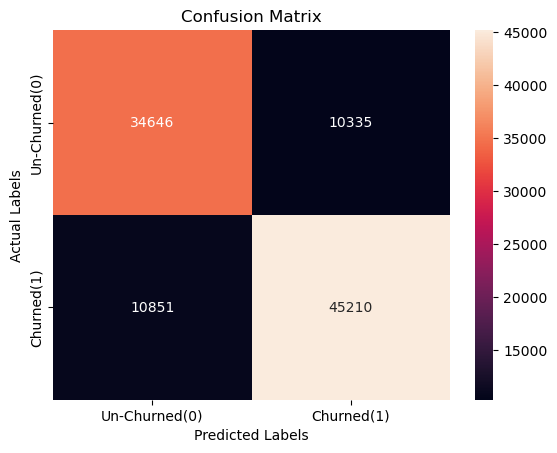

Confusion Matrix As Array Data: 
 [[00(True_Negative)  10(False_Positive)]
 [ 01(False_Negative) 11(True_Positive)]]
 [[34646 10335]
 [10851 45210]]


In [36]:
# Naive Bayes(BernoulliNB) Confusion Matrix
plot_confusion_matrix(test_Y, yhat_naive_bernoulli)

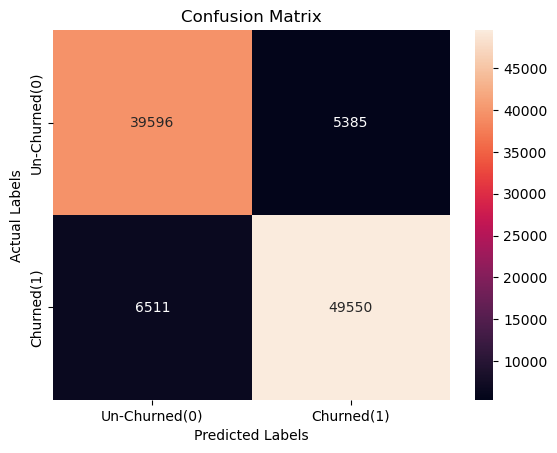

Confusion Matrix As Array Data: 
 [[00(True_Negative)  10(False_Positive)]
 [ 01(False_Negative) 11(True_Positive)]]
 [[39596  5385]
 [ 6511 49550]]


In [37]:
# Decision Tree Classifier Confusion Matrix
plot_confusion_matrix(test_Y, yhat_tree_classifier)

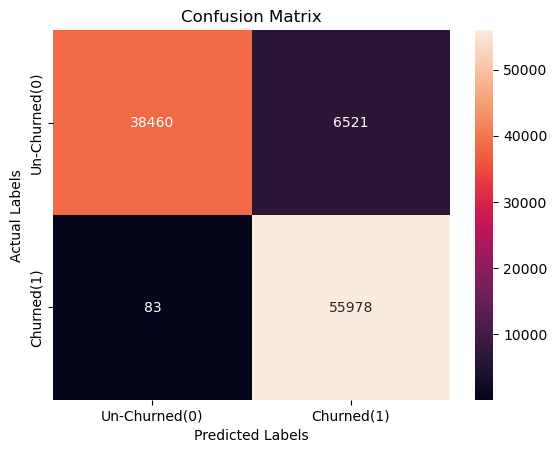

Confusion Matrix As Array Data: 
 [[00(True_Negative)  10(False_Positive)]
 [ 01(False_Negative) 11(True_Positive)]]
 [[38460  6521]
 [   83 55978]]


In [38]:
# Random Forest Classifier Confusion Matrix
plot_confusion_matrix(test_Y, yhat_rand_forest_classifier)

## 2. False Positive Rate(FPR) [Type-1 Error]

**False Positive Rate(FPR) = FP/(FP+TN)**

In [39]:
# Logistic Regression False Positive Rate(FPR)
log_reg_TN = confusion_matrix(test_Y, yhat_log_reg)[0][0]
log_reg_FP = confusion_matrix(test_Y, yhat_log_reg)[0][1]

log_reg_FPR = log_reg_FP/(log_reg_FP+log_reg_TN)

In [40]:
# K-NearestNeighbors False Positive Rate(FPR)
knn_classifier_TN = confusion_matrix(test_Y, yhat_knn_classifier)[0][0]
knn_classifier_FP = confusion_matrix(test_Y, yhat_knn_classifier)[0][1]

knn_classifier_FPR = knn_classifier_FP/(knn_classifier_FP+knn_classifier_TN)

In [41]:
# Naive Bayes(BernoulliNB) False Positive Rate(FPR)
naive_bernoulli_TN = confusion_matrix(test_Y, yhat_naive_bernoulli)[0][0]
naive_bernoulli_FP = confusion_matrix(test_Y, yhat_naive_bernoulli)[0][1]

naive_bernoulli_FPR = naive_bernoulli_FP/(naive_bernoulli_FP+naive_bernoulli_TN)

In [42]:
# Decision Tree Classifier False Positive Rate(FPR)
tree_classifier_TN = confusion_matrix(test_Y, yhat_tree_classifier)[0][0]
tree_classifier_FP = confusion_matrix(test_Y, yhat_tree_classifier)[0][1]

tree_classifier_FPR = tree_classifier_FP/(tree_classifier_FP+tree_classifier_TN)

In [43]:
# Random Forest Classifier False Positive Rate(FPR)
rand_forest_classifier_TN = confusion_matrix(test_Y, yhat_rand_forest_classifier)[0][0]
rand_forest_classifier_FP = confusion_matrix(test_Y, yhat_rand_forest_classifier)[0][1]

rand_forest_classifier_FPR = rand_forest_classifier_FP/(rand_forest_classifier_FP+rand_forest_classifier_TN)

In [44]:
type_1_errors = {'Model Name':['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes(BernoulliNB)', 'Decision Tree Classifier', 'Random Forest Classifier'],
                 'Model FPR Value':[log_reg_FPR, knn_classifier_FPR, naive_bernoulli_FPR, tree_classifier_FPR, rand_forest_classifier_FPR]}
type_1_errors = pd.DataFrame(type_1_errors)

<Axes: title={'center': 'Type 1 Error Graph'}, xlabel='Model Name', ylabel='Model FPR Value'>

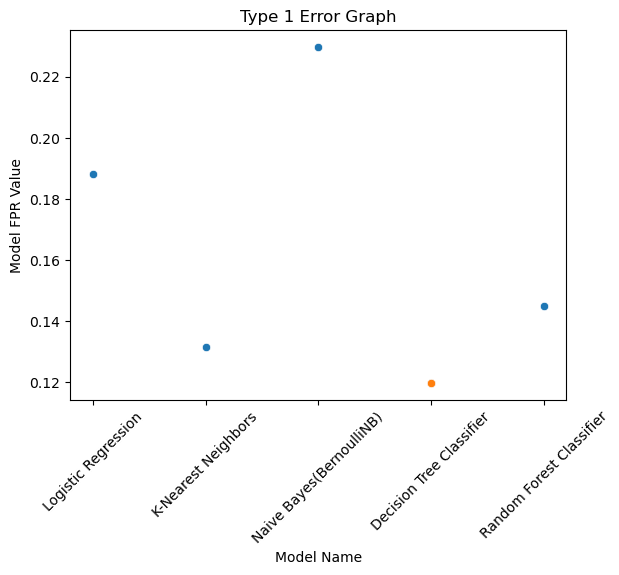

In [45]:
fig_type_1_error = sns.scatterplot(data=type_1_errors, x='Model Name', y='Model FPR Value')
fig_type_1_error.tick_params(axis='x', rotation=45)
fig_type_1_error.set(title='Type 1 Error Graph')

min_FPR = type_1_errors.min()
min_FPR = pd.DataFrame(min_FPR).transpose()
sns.scatterplot(data=min_FPR, x='Model Name', y='Model FPR Value', ax=fig_type_1_error)

## 3. False Negative Rate(FNR) [Type-2 Error]

**False Negative Rate(FNR)=FN/(FN+TP)**

In [46]:
# Logistic Regression False Negative Rate(FNR)
log_reg_FN = confusion_matrix(test_Y, yhat_log_reg)[1][0]
log_reg_TP = confusion_matrix(test_Y, yhat_log_reg)[1][1]

log_reg_FNR = log_reg_FN/(log_reg_FN+log_reg_TP)

In [47]:
# K-NearestNeighbors False Negative Rate(FNR)
knn_classifier_FN = confusion_matrix(test_Y, yhat_knn_classifier)[1][0]
knn_classifier_TP = confusion_matrix(test_Y, yhat_knn_classifier)[1][1]

knn_classifier_FNR = knn_classifier_FN/(knn_classifier_FN+knn_classifier_TP)

In [48]:
# Naive Bayes(BernoulliNB) False Negative Rate(FNR)
naive_bernoulli_FN = confusion_matrix(test_Y, yhat_naive_bernoulli)[1][0]
naive_bernoulli_TP = confusion_matrix(test_Y, yhat_naive_bernoulli)[1][1]

naive_bernoulli_FNR = naive_bernoulli_FN/(naive_bernoulli_FN+naive_bernoulli_TP)

In [49]:
# Decision Tree Classifier False Negative Rate(FNR)
tree_classifier_FN = confusion_matrix(test_Y, yhat_tree_classifier)[1][0]
tree_classifier_TP = confusion_matrix(test_Y, yhat_tree_classifier)[1][1]

tree_classifier_FNR = tree_classifier_FN/(tree_classifier_FN+tree_classifier_TP)

In [50]:
# Random Forest Classifier False Negative Rate(FNR)
rand_forest_classifier_FN = confusion_matrix(test_Y, yhat_rand_forest_classifier)[1][0]
rand_forest_classifier_TP = confusion_matrix(test_Y, yhat_rand_forest_classifier)[1][1]

rand_forest_classifier_FNR = rand_forest_classifier_FN/(rand_forest_classifier_FN+rand_forest_classifier_TP)

In [51]:
type_2_errors = {'Model Name':['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes(BernoulliNB)', 'Decision Tree Classifier', 'Random Forest Classifier'],
                 'Model FNR Value':[log_reg_FNR, knn_classifier_FNR, naive_bernoulli_FNR, tree_classifier_FNR, rand_forest_classifier_FNR]}
type_2_errors = pd.DataFrame(type_2_errors)

<Axes: title={'center': 'Type 2 Error Graph'}, xlabel='Model Name', ylabel='Model FNR Value'>

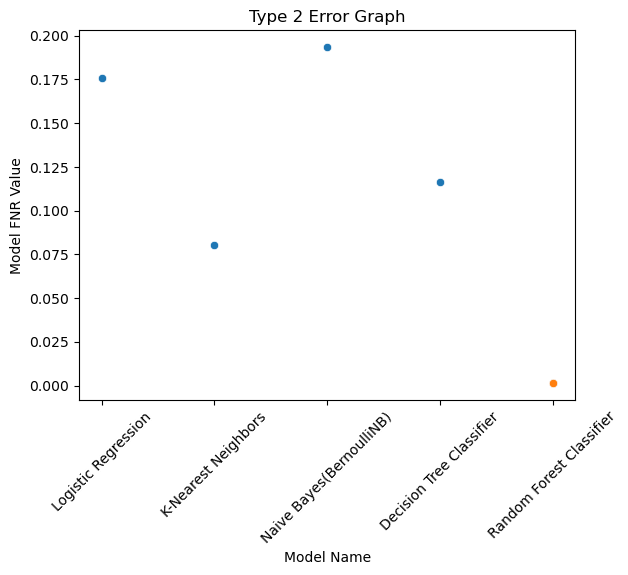

In [52]:
fig_type_2_error = sns.scatterplot(data=type_2_errors, x='Model Name', y='Model FNR Value')
fig_type_2_error.tick_params(axis='x', rotation=45)
fig_type_2_error.set(title='Type 2 Error Graph')

min_FNR = type_2_errors[type_2_errors.loc[:,'Model FNR Value'] == type_2_errors.min()[1]]
sns.scatterplot(data=min_FNR, x='Model Name', y='Model FNR Value', ax=fig_type_2_error)


## 4. Accuracy

Formualization of the Accuracy is as shown below. However, accuracy_score() function from the scikit-learn library is used in this project in order to get code clarity.

**Accuracy=(TP+TN)/(TP+FP+FN+TN)**

In [53]:
accuracy_log_reg = accuracy_score(test_Y, yhat_log_reg)
accuracy_knn_classifier = accuracy_score(test_Y, yhat_knn_classifier)
accuracy_naive_bernoulli = accuracy_score(test_Y, yhat_naive_bernoulli)
accuracy_tree_classifier = accuracy_score(test_Y, yhat_tree_classifier)
rand_forest_classifier = accuracy_score(test_Y, yhat_rand_forest_classifier)

accuracy_scores = {'Model Name':['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes(BernoulliNB)', 'Decision Tree Classifier', 'Random Forest Classifier'],
                  'Accuracy Scores Of Models':[accuracy_log_reg, accuracy_knn_classifier, accuracy_naive_bernoulli, accuracy_tree_classifier, rand_forest_classifier]}

accuracy_scores = pd.DataFrame(accuracy_scores)

<Axes: title={'center': 'Accuracy Score Graph'}, xlabel='Model Name', ylabel='Accuracy Scores Of Models'>

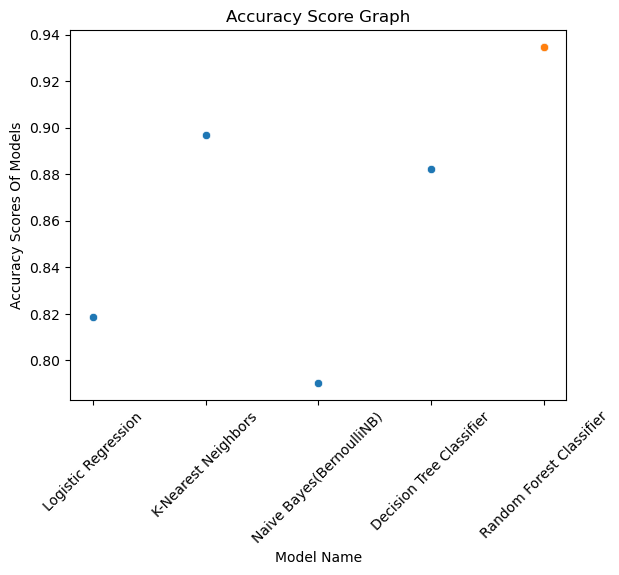

In [54]:
fig_accuracy_scores = sns.scatterplot(data=accuracy_scores, x='Model Name', y='Accuracy Scores Of Models')
fig_accuracy_scores.tick_params(axis='x', rotation=45)
fig_accuracy_scores.set(title='Accuracy Score Graph')

max_accuracy_score = accuracy_scores[accuracy_scores.loc[:,'Accuracy Scores Of Models'] == accuracy_scores.max()[1]]
sns.scatterplot(data=max_accuracy_score, x='Model Name', y='Accuracy Scores Of Models', ax=fig_accuracy_scores)

---

# Conclusion

In this project, 5 different classification ML models have used **(Logistic Regression ,K-Nearest Neighbours(KNN), Naïve Bayes, Decision Tree Classification, Random Forest Classification)**. 
<Br>
<Br>Among all these models, Decision Tree Classifier has the minimum Type-1 Error Rate. And, Type-1 Error Rate is abut the ratio of false predictions in the total 1 classified predictions.

Random Forest Classifier Model has the minimum Type-2 Error Rate. And, Type-2 Error Rate is about the false predicted 1 classification in the actual 1 cassified data. Therefore, 1 classified predictions in the actual 1 classified data should have priority in the Type-1 and Type-2 Error Rate.
    
Also, Random Forest Classifier Model has the highest accuracy score. And, higher accuracy scores provides higher correct predictions.
    
    
As a result, **Therefore, Random Forest Classsifier Model can be said that it is the best fitted model.**

---